<h1>GERMANIA

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI GERMANIA</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Germania</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_ge.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2016-01-11,Germany,18439
1,2016-01-18,Germany,18627
2,2016-01-25,Germany,18707
3,2016-02-01,Germany,18493
4,2016-02-08,Germany,18541


In [2]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
215,2020-03-02,Germany,19476
216,2020-03-09,Germany,19630
217,2020-03-16,Germany,19871
218,2020-03-23,Germany,19729
219,2020-03-30,Germany,19692


<h3>Creazione serie storica dei decessi totali</h3>

In [4]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    98398
2020-04-30    78931
2020-05-31    69607
2020-06-30    84189
2020-07-31    65896
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI IN GERMANIA</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati in <b>Germania</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [5]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_ge.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-23,0.0
1,1,2020-01-24,0.0
2,2,2020-01-25,0.0
3,3,2020-01-26,0.0
4,4,2020-01-27,0.0


In [6]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [7]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
38,38,2020-03-01,0.0
39,39,2020-03-02,0.0
40,40,2020-03-03,0.0
41,41,2020-03-04,0.0
42,42,2020-03-05,0.0


In [8]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,1643,775.0
2020-04-30,2505,5848.0
2020-05-31,3534,1917.0
2020-06-30,4335,450.0
2020-07-31,5425,157.0
2020-08-31,6386,156.0
2020-09-30,7095,192.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [9]:
covid = covid.Value
covid.head()

Date
2020-03-31     775.0
2020-04-30    5848.0
2020-05-31    1917.0
2020-06-30     450.0
2020-07-31     157.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati in <b>Germania</b> secondo la predizione del modello SARIMA applicato. 

In [10]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_ge.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2016-01-31,0.000000
1,2016-02-29,54387.786083
2,2016-03-31,74589.240245
3,2016-04-30,66326.158838
4,2016-05-31,83915.526659


In [11]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2016-01-31,0.000000
1,2016-02-29,54387.786083
2,2016-03-31,74589.240245
3,2016-04-30,66326.158838
4,2016-05-31,83915.526659


In [12]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [13]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
50,2020-03-31,83910.504644
51,2020-04-30,80873.911091
52,2020-05-31,69780.633226
53,2020-06-30,87540.515685
54,2020-07-31,75893.756910


In [14]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,83910.504644
2020-04-30,80873.911091
2020-05-31,69780.633226
2020-06-30,87540.515685
2020-07-31,75893.756910


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [15]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [16]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_ge_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2016-01-31,136022.892980
1,2016-02-29,84515.067069
2,2016-03-31,101341.675858
3,2016-04-30,88157.037095
4,2016-05-31,105744.111611


In [17]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2016-01-31,136022.892980
1,2016-02-29,84515.067069
2,2016-03-31,101341.675858
3,2016-04-30,88157.037095
4,2016-05-31,105744.111611


In [18]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,99581.779375
2020-04-30,96545.966868
2020-05-31,85917.812598
2020-06-30,103789.476500
2020-07-31,92298.041570


In [19]:
upper = upper.Totale

<h3>Limite minimo

In [20]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_ge_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2016-01-31,-136022.892980
1,2016-02-29,24260.505097
2,2016-03-31,47836.804632
3,2016-04-30,44495.280581
4,2016-05-31,62086.941706


In [21]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2016-01-31,-136022.892980
1,2016-02-29,24260.505097
2,2016-03-31,47836.804632
3,2016-04-30,44495.280581
4,2016-05-31,62086.941706


In [22]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,68239.229912
2020-04-30,65201.855315
2020-05-31,53643.453854
2020-06-30,71291.554870
2020-07-31,59489.472250


In [23]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati in <b>Germania</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

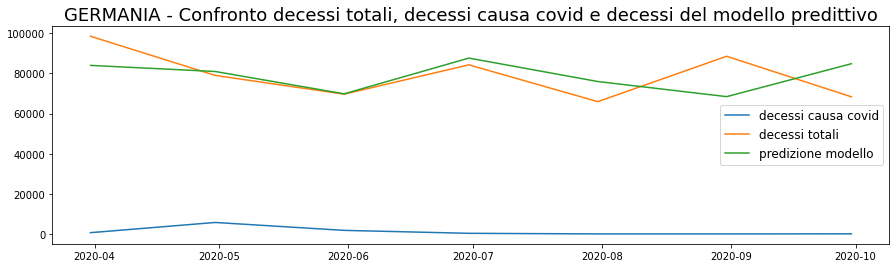

In [24]:
plt.figure(figsize=(15,4))
plt.title('GERMANIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

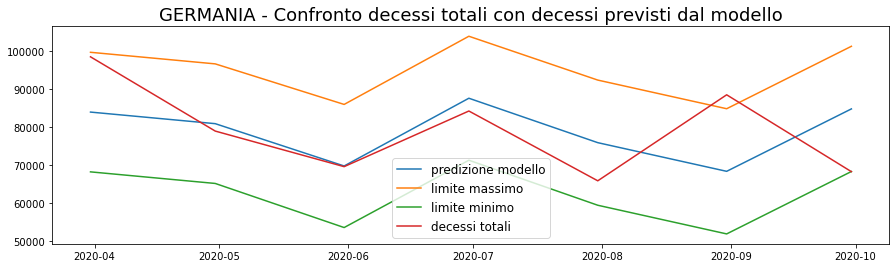

In [25]:
plt.figure(figsize=(15,4))
plt.title("GERMANIA - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

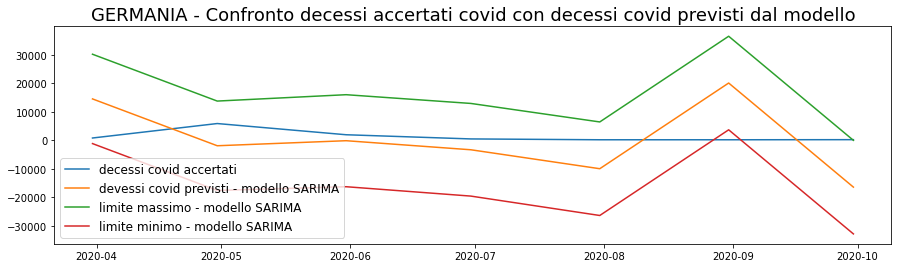

In [26]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("GERMANIA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

In [27]:
d = decessi_tot.sum()
print("Decessi 2020:", d)

Decessi 2020: 553752


In [28]:
d_m = predictions.sum()
print("Decessi attesi dal modello 2020:", d_m)

Decessi attesi dal modello 2020: 551125.8022656284


In [29]:
d_lower = lower.sum()
print("Decessi attesi dal modello 2020 - livello mimino:", d_lower)

Decessi attesi dal modello 2020 - livello mimino: 438173.86377320264


<h3>Numero totale dei decessi accertati COVID-19 registrati in Germania</h3>

In [30]:
m = covid.sum()
print((m))

9495.0


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la Germania</h3>

<h4>Valore medio

In [31]:
total = n.sum()
print((total))

2626.197734371657


<h4>Valore massimo

In [32]:
total_upper = n_upper.sum()
print((total_upper))

115578.13622679735


<h4>Valore minimo

In [33]:
total_lower = n_lower.sum()
print(int(total_lower))

-110325


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA in Germania</h3>

<h4>Valore medio

In [34]:
x = decessi_tot - predictions - covid
x = x.sum()
print((x))

-6868.802265628343


<h4>Valore massimo

In [35]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print((x_upper))

106083.13622679735


<h4>Valore minimo

In [36]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-119820
